In [29]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [138]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
file_name = list(uploaded.keys())[0]
bank = pd.read_csv(file_name)
print(bank.info())
print(bank.head())
print(bank.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
   age         job  marital  education default  balance housing loan  contact  \
0   59      a

In [139]:
missing_values = bank.isnull().sum()
total_missing = missing_values.sum()
print("Missing values count for each column:")
print(missing_values)
print("\nTotal missing values count:", total_missing)

Missing values count for each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Total missing values count: 0


In [140]:
bank.shape

(11162, 17)

In [141]:
bank['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [142]:
le = LabelEncoder()
bank['job']=le.fit_transform(bank['job'])
bank['marital']=le.fit_transform(bank['marital'])
bank['education']=le.fit_transform(bank['education'])
bank['housing']=le.fit_transform(bank['housing'])
bank['loan']=le.fit_transform(bank['loan'])
bank['contact']=le.fit_transform(bank['contact'])
bank['month']=le.fit_transform(bank['month'])
bank['poutcome']=le.fit_transform(bank['poutcome'])
bank['deposit']=le.fit_transform(bank['deposit'])
bank['default']=le.fit_transform(bank['default'])

In [145]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,3,1
6,56,4,1,2,0,830,1,1,2,6,8,1201,1,-1,0,3,1
7,60,5,0,1,0,545,1,0,2,6,8,1030,1,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,3,1
9,28,7,2,1,0,5090,1,0,2,6,8,1297,3,-1,0,3,1


In [146]:
bank['job'].unique()

array([ 0,  9,  7,  4,  5,  1, 10,  2,  3, 11,  6,  8])

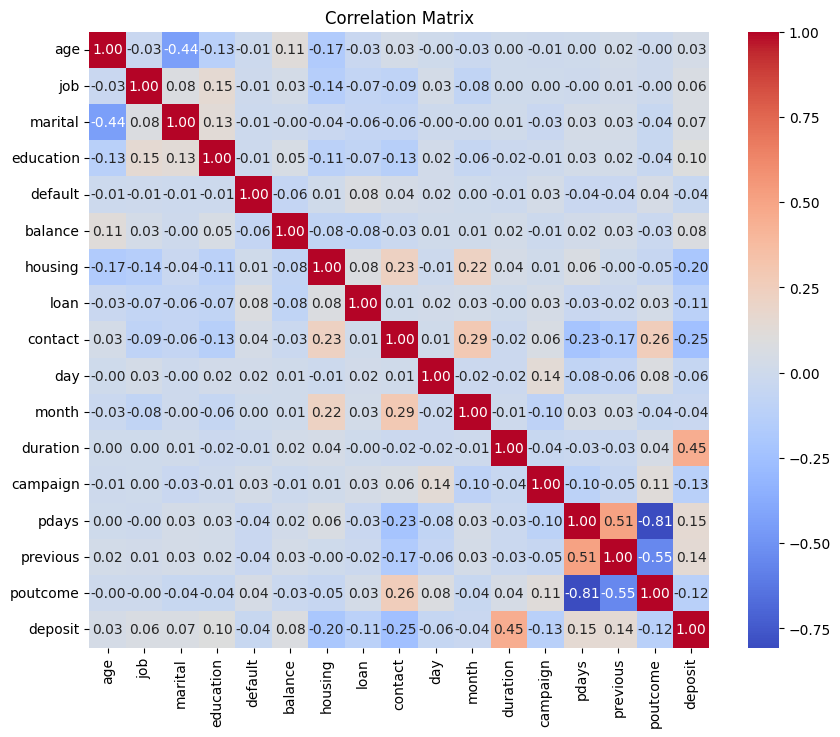

In [167]:
correlation_matrix = bank.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [149]:
X = bank.drop('deposit', axis = 1)
y = bank['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))

(7813, 16)
(7813,)
(3349, 16)
(3349,)
<class 'pandas.core.frame.DataFrame'>


In [151]:
class NaiveBayes:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_class = X[np.where(y == c)]
            self.parameters.append([])
            for col in X_class.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, var, x):
        eps = 1e-4
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-(np.power(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

    def _calculate_prior(self, c):
        return np.mean(self.y == c)

    def _calculate_posterior(self, x):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self._calculate_prior(c))
            posterior = np.sum(np.fromiter((np.log(self._calculate_likelihood(self.parameters[i][j]["mean"], self.parameters[i][j]["var"], x[j])) for j, _ in enumerate(x)), dtype=float))
            posterior = prior + posterior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        y_pred = [self._calculate_posterior(x) for x in X]
        return y_pred

np.random.seed(42)
X_train = np.random.randn(100, 2)
y_train = np.random.randint(0, 2, 100)
nb_classifier = NaiveBayes()
nb_classifier.fit(X_train, y_train)
X_test = np.random.randn(20, 2)
y_test = np.random.randint(0, 2, 20)
nb_y_pred = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1_score = f1_score(y_test, nb_y_pred)

print("Naive Bayes Results: ")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1_score)


Naive Bayes Results: 
Accuracy: 0.7
Precision: 0.5454545454545454
Recall: 0.8571428571428571
F1 Score: 0.6666666666666665


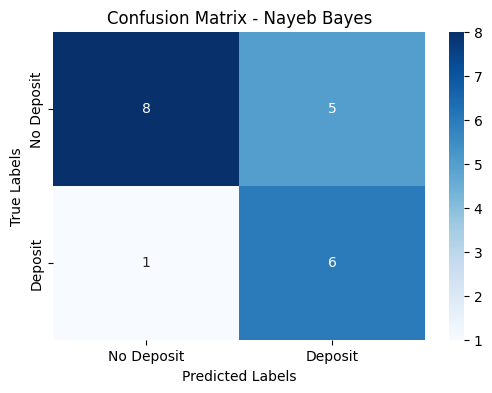

In [152]:
conf_matrix = confusion_matrix(y_test, nb_y_pred)
conf_matrix_labels =['No Deposit', 'Deposit']
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=conf_matrix_labels, yticklabels=conf_matrix_labels)
plt.title('Confusion Matrix - Nayeb Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

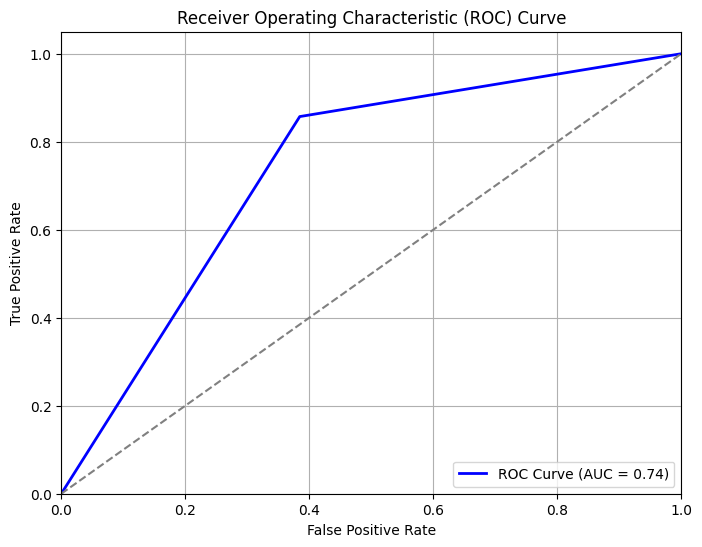

In [155]:
fpr, tpr, thresholds = roc_curve(y_test, nb_y_pred)
auc = np.trapz(tpr, fpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


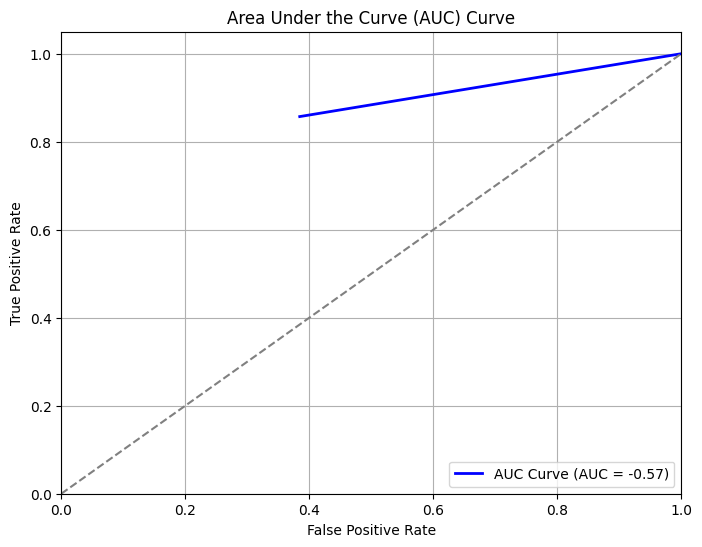

In [156]:
tpr_values = []
fpr_values = []
thresholds_values = np.linspace(0, 1, 100)

for threshold in thresholds_values:
    y_pred_binary = np.where(nb_y_pred >= threshold, 1, 0)

    tp = np.sum((y_test == 1) & (y_pred_binary == 1))
    fn = np.sum((y_test == 1) & (y_pred_binary == 0))
    fp = np.sum((y_test == 0) & (y_pred_binary == 1))
    tn = np.sum((y_test == 0) & (y_pred_binary == 0))

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    tpr_values.append(tpr)
    fpr_values.append(fpr)
auc = np.trapz(tpr_values, fpr_values)

plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, color='blue', lw=2, label='AUC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the Curve (AUC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [158]:
class KNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for test_point in X_test:
            distances = np.sqrt(np.sum((self.X_train - test_point) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(label_counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)

knn_classifier = KNNClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1_score = f1_score(y_test, knn_y_pred)

print("K-Nearest Neighbors Results: ")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1_score)


K-Nearest Neighbors Results: 
Accuracy: 0.55
Precision: 0.4166666666666667
Recall: 0.7142857142857143
F1 Score: 0.5263157894736842


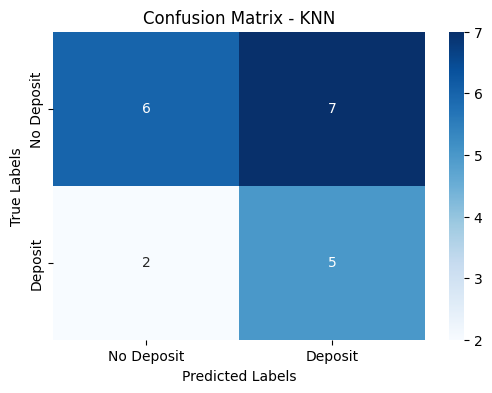

In [162]:
conf_matrix_knn = confusion_matrix(y_test, knn_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=conf_matrix_labels, yticklabels=conf_matrix_labels)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


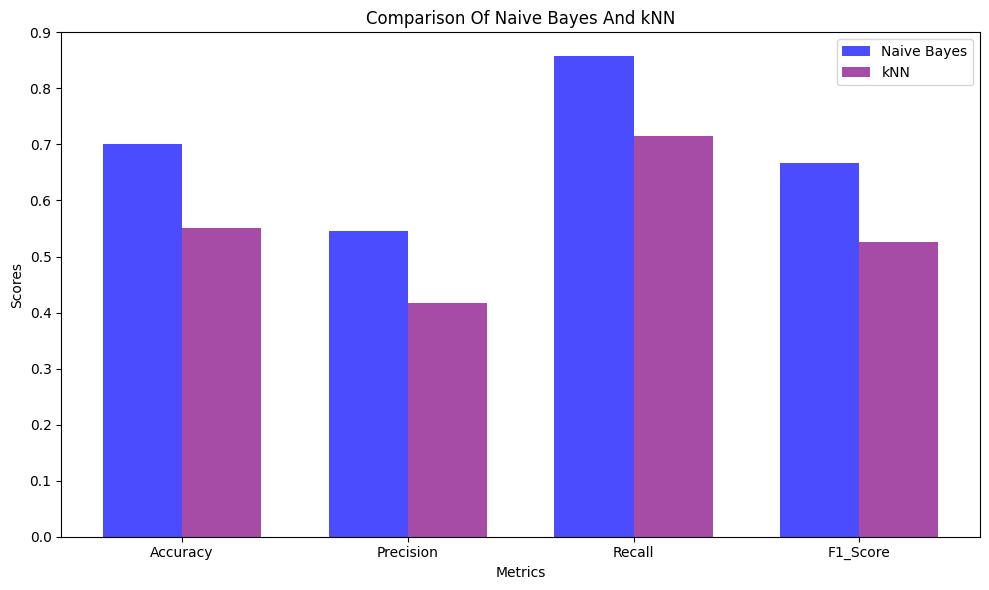

Average scores for Naive Bayes:
  - Accuracy: 0.7
  - Precision: 0.5454545454545454
  - Recall: 0.8571428571428571
  - F1 Score: 0.6666666666666665

Average scores for KNN:
  - Accuracy: 0.55
  - Precision: 0.4166666666666667
  - Recall: 0.7142857142857143
  - F1 Score: 0.5263157894736842

Naive Bayes performs better overall.


In [181]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
nb_metrics = [nb_accuracy, nb_precision, nb_recall, nb_f1_score]
knn_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1_score]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, nb_metrics, bar_width, label='Naive Bayes',alpha=0.7, color='blue')
plt.bar(index + bar_width, knn_metrics, bar_width, label='kNN',alpha=0.7, color='purple')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison Of Naive Bayes And kNN')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.tight_layout()
plt.show()

avg_nb_metrics = np.mean(nb_metrics)
avg_knn_metrics = np.mean(knn_metrics)

print("Average scores for Naive Bayes:")
print("  - Accuracy:", nb_accuracy)
print("  - Precision:", nb_precision)
print("  - Recall:", nb_recall)
print("  - F1 Score:", nb_f1_score)

print("\nAverage scores for KNN:")
print("  - Accuracy:", knn_accuracy)
print("  - Precision:", knn_precision)
print("  - Recall:", knn_recall)
print("  - F1 Score:", knn_f1_score)

if avg_nb_metrics > avg_knn_metrics:
    print("\nNaive Bayes performs better overall.")
elif avg_nb_metrics < avg_knn_metrics:
    print("\nKNN performs better overall.")
else:
    print("\nThe performance of Naive Bayes and KNN is comparable.")
